#### 2. Notebook zur logistischen Regression; Zielvariable: Themenerwähnung im Bundestag
Zielvariable ist hier, ob ein Thema im Bundestag erwähnt wurde. Dementsprechend werden Bundestagsreden zum Zeitpunkt t+1 als Zielvariable hinzugezogen. Was es dabei unbedingt zu beachten gilt, ist dass, da meine Zeitreihe nicht kontinuierlich ist, bei den Bundestagsreden zum Zeitpunkt t die vorangegangene Bundestagssitzung gemeint ist und *nicht* eine Sitzung am Tag zuvor!

#### Vorbereitung

In [2]:
import pandas as pd
subset_reden = pd.read_csv("subset_reden.csv")
subset_posts = pd.read_csv("subset_posts.csv")

In [3]:
subset_reden["date"] = pd.to_datetime(subset_reden["date"])
#Zusammenzählen von CDU & CSU
#subset_reden["partei"] = subset_reden["partei"].replace({"CDU" : "CDU/CSU", "CSU":"CDU/CSU"})
subset_posts["date"] = pd.to_datetime(subset_posts["date"])
# 🔹 2️⃣ Gruppiere die Themen täglich und zähle die Häufigkeit der Themen pro Tag
redethemen_täglich = subset_reden.groupby(['date', 'Topic']).size().unstack(fill_value=0)
postthemen_täglich = subset_posts.groupby(['date', 'Topic']).size().unstack(fill_value=0)
# Berechnung der täglichen Summen der Wortanzahlen
reden_komplexität_täglich = subset_reden.groupby('date')['komplexität'].sum()
posts_komplexität_täglich = subset_posts.groupby('date')['komplexität'].sum()

# Führe einen inner join durch, damit nur gemeinsame Tage beibehalten werden
common_dates = redethemen_täglich.index.intersection(postthemen_täglich.index)
redethemen_täglich_aligned = redethemen_täglich.loc[common_dates]
postthemen_täglich_aligned = postthemen_täglich.loc[common_dates]
# posts_shifted enthält die Facebookposts mit lag t+1, Die Daten hier sind zwar die gleichen wie in den anderen Dataframes,
 # die Werte jedoch die vom Vortag, weshalb die Analyse zulässig ist
reden_shifted=redethemen_täglich_aligned.shift().dropna()
# # # Erneute Anpassung des Datums
common_dates2 = redethemen_täglich.index.intersection(reden_shifted.index)
rede_komplex = reden_komplexität_täglich.loc[common_dates]
posts_komplex = posts_komplexität_täglich.loc[common_dates]

In [4]:
unique_topics = subset_posts.drop_duplicates(subset=["Topic"])
unique_topics= unique_topics[["Topic", "CustomName"]]
unique_topics.reset_index()

,index,Topic,CustomName
0,0,4,Russland-Ukraine-Konflikt und Zuwanderungskrim...
1,1,35,Gegenerziehung: Gendersprache im öffentlichen ...
2,2,20,Bundesregierung plant Verbot von Gasheizungen ...
3,4,21,Wahlrechtsform zur Verkleinerung des Bundestags
4,5,0,Corona-Pandemie und Pflegenotstand in Deutschland
...,...,...,...
89,2515,93,Bayerisches Wochenendziel
90,2690,62,Polit-Podcasts aus Hessen
91,3335,72,Deutsche Parlamentarische Verfahren
92,3384,64,Mitbestimmung in Unternehmen - Richtlinien und...


In [14]:
unique_topics[unique_topics["Topic"] == 6]

,Topic,CustomName
145,6,Frühkindliche Bildung und Betreuung in Kitas


In [13]:
unique_topics["CustomName"].unique()

array(['Russland-Ukraine-Konflikt und Zuwanderungskriminalität in Deutschland',
       'Gegenerziehung: Gendersprache im öffentlichen Leben in Deutschland[/INST]',
       'Bundesregierung plant Verbot von Gasheizungen - Förderung von Wärmepumpen',
       'Wahlrechtsform zur Verkleinerung des Bundestags',
       'Corona-Pandemie und Pflegenotstand in Deutschland',
       'Bildungspolitik in Deutschland',
       'Sicherheit in deutschen Freibädern',
       'Migration und Asyl in Deutschland',
       'Russischer Angriffskrieg in der Ukraine und Europas Reaktion[/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/IN

In [6]:
unique_topics.to_csv("unique_topics.csv")

In [7]:
r = subset_reden[(subset_reden["date"] >= '2022-05-31') & (subset_reden["date"] <= '2023-05-12')]
r[r["partei"] == "CDU"]

,Unnamed: 0.1,Unnamed: 0,Document,Topic,Name,CustomName,Representation,KeyBERT,Llama3.1,MMR,Representative_Docs,Top_n_words,Probability,Representative_document,date,partei,art,komplexität
735,1095,1095,beratungen einzelplans bundesministerium woh...,8,8_wohnungen_bauen_wohnen_wohnraum,Bezahlbarer Wohnraum in Bayern,"['wohnungen', 'bauen', 'wohnen', 'wohnraum', '...","['wohnungspolitik', 'wohngeldreform', 'wohnung...",['Bezahlbarer Wohnraum in Bayern\n\n[INST]\nIc...,"['bauen', 'mieter', 'wohnungsmarkt', 'sozialwo...",['los herbstklausur nürnberg startet dringend...,wohnungen - bauen - wohnen - wohnraum - wohnun...,0.986716,False,2022-05-31,CDU,redebeitrag,260
745,1107,1107,föst zahlen vorschläge haushalt wiederfinde...,8,8_wohnungen_bauen_wohnen_wohnraum,Bezahlbarer Wohnraum in Bayern,"['wohnungen', 'bauen', 'wohnen', 'wohnraum', '...","['wohnungspolitik', 'wohngeldreform', 'wohnung...",['Bezahlbarer Wohnraum in Bayern\n\n[INST]\nIc...,"['bauen', 'mieter', 'wohnungsmarkt', 'sozialwo...",['los herbstklausur nürnberg startet dringend...,wohnungen - bauen - wohnen - wohnraum - wohnun...,1.000000,False,2022-05-31,CDU,redebeitrag,236
751,1117,1117,verehrte froh bisschen schwung ganze zah...,8,8_wohnungen_bauen_wohnen_wohnraum,Bezahlbarer Wohnraum in Bayern,"['wohnungen', 'bauen', 'wohnen', 'wohnraum', '...","['wohnungspolitik', 'wohngeldreform', 'wohnung...",['Bezahlbarer Wohnraum in Bayern\n\n[INST]\nIc...,"['bauen', 'mieter', 'wohnungsmarkt', 'sozialwo...",['los herbstklausur nürnberg startet dringend...,wohnungen - bauen - wohnen - wohnraum - wohnun...,1.000000,False,2022-05-31,CDU,redebeitrag,193
752,1119,1119,daldrup zwischenfrage ersten dauer lange ...,8,8_wohnungen_bauen_wohnen_wohnraum,Bezahlbarer Wohnraum in Bayern,"['wohnungen', 'bauen', 'wohnen', 'wohnraum', '...","['wohnungspolitik', 'wohngeldreform', 'wohnung...",['Bezahlbarer Wohnraum in Bayern\n\n[INST]\nIc...,"['bauen', 'mieter', 'wohnungsmarkt', 'sozialwo...",['los herbstklausur nürnberg startet dringend...,wohnungen - bauen - wohnen - wohnraum - wohnun...,1.000000,False,2022-05-31,CDU,redebeitrag,152
753,1120,1120,mache gelegenheit zeitenwende gemeinsame k...,77,77_zinssatz_zinsen_abgabenordnung_zinssatzes,Bundesverfassungsgericht entscheidet über Zins...,"['zinssatz', 'zinsen', 'abgabenordnung', 'zins...","['nachzahlungszinsen', 'vollverzinsung', 'steu...",['Bundesverfassungsgericht entscheidet über Zi...,"['abgabenordnung', 'erstattungszinsen', 'vollv...",['bundesverfassungsgericht verpflichtet zinss...,zinssatz - zinsen - abgabenordnung - zinssatze...,1.000000,False,2022-05-31,CDU,redebeitrag,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7491,11678,11678,ferlemann dramatische abrutschen dargestellt ...,78,78_frankreich_atomkraft_atomkraftwerke_kernkra...,Russland-Ukraine-Konflikt und Energiesicherhei...,"['frankreich', 'atomkraft', 'atomkraftwerke', ...","['kernkraftwerke', 'energiepolitik', 'kernkraf...",['Russland-Ukraine-Konflikt und Energiesicherh...,"['frankreich', 'kernkraftwerke', 'strom', 'ern...",['draußen heißer junitag sommerferien bevor ...,frankreich - atomkraft - atomkraftwerke - kern...,1.000000,False,2023-05-12,CDU,redebeitrag,141
7496,11695,11695,anrede „don“ wahrscheinlich robert habeck ve...,8,8_wohnungen_bauen_wohnen_wohnraum,Bezahlbarer Wohnraum in Bayern,"['wohnungen', 'bauen', 'wohnen', 'wohnraum', '...","['wohnungspolitik', 'wohngeldreform', 'wohnung...",['Bezahlbarer Wohnraum in Bayern\n\n[INST]\nIc...,"['bauen', 'mieter', 'wohnungsmarkt', 'sozialwo...",['los herbstklausur nürnberg startet dringend...,wohnungen - bauen - wohnen - wohnraum - wohnun...,0.979697,False,2023-05-12,CDU,redebeitrag,112
7497,11697,11697,bereit akzeptieren völlig unterschiedliche sa...,8,8_wohnungen_bauen_wohnen_wohnraum,Bezahlbarer Wohnraum in Bayern,"['wohnungen', 'bauen', 'wohnen', 'wohnraum', '...","['wohnungspolitik', 'wohngeldreform', 'wohnung...",['Bezahlbarer Wohnraum in Bayern\n\n[INST]\nIc...,"['bauen', 'mieter', 'wohnu

In [8]:
subset_reden["CustomName"].replace('Russischer Angriffskrieg in der Ukraine und Europas Reaktion                                                                                                                                                                 [/INST', "Russischer Angriffskrieg in der Ukraine und Europas Reaktion")


0       Russischer Angriffskrieg in der Ukraine und Eu...
1             Bekämpfung sexuellem Missbrauch im Internet
2             Bekämpfung sexuellem Missbrauch im Internet
3             Bekämpfung sexuellem Missbrauch im Internet
4             Bekämpfung sexuellem Missbrauch im Internet
                              ...                        
7862    Deutschlands Verkehrsinfrastruktur soll beschl...
7863    Deutschlands Verkehrsinfrastruktur soll beschl...
7864    Deutschlands Verkehrsinfrastruktur soll beschl...
7865    Russischer Angriffskrieg in der Ukraine - Ausw...
7866                        Plenarsitzung des Bundestages
Name: CustomName, Length: 7867, dtype: object

In [9]:
subset_reden["CustomName"][0]

'Russischer Angriffskrieg in der Ukraine und Europas Reaktion[/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/I

In [10]:
# Remove leading and trailing whitespace before performing the replacement
subset_reden["CustomName"] = subset_reden["CustomName"].str.strip()
subset_reden["CustomName"] = subset_reden["CustomName"].replace(
    'Russischer Angriffskrieg in der Ukraine und Europas Reaktion                                                                                                                                                                 [/INST',
    "Russischer Angriffskrieg in der Ukraine und Europas Reaktion"
)

In [11]:
r

,Unnamed: 0.1,Unnamed: 0,Document,Topic,Name,CustomName,Representation,KeyBERT,Llama3.1,MMR,Representative_Docs,Top_n_words,Probability,Representative_document,date,partei,art,komplexität
725,1073,1073,bundeshaushalt umfasst milliarden milliard...,0,0_corona_pflege_lauterbach_maskenpflicht,Corona-Pandemie und Pflegenotstand in Deutschland,"['corona', 'pflege', 'lauterbach', 'maskenpfli...","['gesundheitspolitischer', 'impfpflicht', 'imp...",['Corona-Pandemie und Pflegenotstand in Deutsc...,"['lauterbach', 'maskenpflicht', 'versorgung', ...",['mangel pflegepersonal ließ wohl landesminis...,corona - pflege - lauterbach - maskenpflicht -...,0.972841,False,2022-05-31,AfD,redebeitrag,380
726,1074,1074,bevor aufrufe kurzen hinweis mitglieder re...,5,5_redezeit_bündnis_zwischenfrage_kurzintervention,Plenarsitzung des Bundestages,"['redezeit', 'bündnis', 'zwischenfrage', 'kurz...","['abstimmung', 'redezeiten', 'redezeit', 'zwis...",['Plenarsitzung des Bundestages\n\n[INST]\nIch...,"['redezeit', 'kurzintervention', 'protokoll', ...",['bevor weiterreden einreißen redezeit künstli...,redezeit - bündnis - zwischenfrage - kurzinter...,1.000000,False,2022-05-31,SPD,redebeitrag,14
727,1075,1075,geschätzte beraten woche abschließend bun...,2,2_ukraine_bundeswehr_krieg_russland,Russischer Angriffskrieg in der Ukraine und Eu...,"['ukraine', 'bundeswehr', 'krieg', 'russland',...","['militärisch', 'waffenlieferungen', 'militäri...",['Russischer Angriffskrieg in der Ukraine und ...,"['ukraine', 'bundeswehr', 'nato', 'sondervermö...",['vergangenen sonntagabend konnten koalitionsf...,ukraine - bundeswehr - krieg - russland - frie...,0.482274,False,2022-05-31,SPD,redebeitrag,326
728,1079,1079,liebes finanzpolitikgeplagtes publikum allüber...,52,52_inflation_milliarden_ezb_schuldenbremse,Inflation und Finanzpolitik im Kontext der Cor...,"['inflation', 'milliarden', 'ezb', 'schuldenbr...","['vermögensabgabe', 'inflationsausgleichsgeset...",['Inflation und Finanzpolitik im Kontext der C...,"['inflation', 'milliarden', 'schuldenbremse', ...",['middelberg verlaub ton rede teilen hause er...,inflation - milliarden - ezb - schuldenbremse ...,0.961712,False,2022-05-31,AfD,redebeitrag,210
729,1081,1081,haushalt einzige fingerhakelei unehrlich mil...,52,52_inflation_milliarden_ezb_schuldenbremse,Inflation und Finanzpolitik im Kontext der Cor...,"['inflation', 'milliarden', 'ezb', 'schuldenbr...","['vermögensabgabe', 'inflationsausgleichsgeset...",['Inflation und Finanzpolitik im Kontext der C...,"['inflation', 'milliarden', 'schuldenbremse', ...",['middelberg verlaub ton rede teilen hause er...,inflation - milliarden - ezb - schuldenbremse ...,1.000000,False,2022-05-31,DIE LINKE.,redebeitrag,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7504,11705,11705,zwischenfrage vergessen formuliert vorschlag...,8,8_wohnungen_bauen_wohnen_wohnraum,Bezahlbarer Wohnraum in Bayern,"['wohnungen', 'bauen', 'wohnen', 'wohnraum', '...","['wohnungspolitik', 'wohngeldreform', 'wohnung...",['Bezahlbarer Wohnraum in Bayern\n\n[INST]\nIc...,"['bauen', 'mieter', 'wohnungsmarkt', 'sozialwo...",['los herbstklausur nürnberg startet dringend...,wohnungen - bauen - wohnen - wohnraum - wohnun...,1.000000,False,2023-05-12,FDP,redebeitrag,238
7505,11706,11706,demokratischen parteien statistisch belegt äl...,8,8_wohnungen_bauen_wohnen_wohnraum,Bezahlbarer Wohnraum in Bayern,"['wohnungen', 'bauen', 'wohnen', 'wohnraum', '...","['wohnungspolitik', 'wohngeldreform', 'wohnung...",['Bezahlbarer Wohnraum in Bayern\n\n[INST]\nIc...,"['bauen', 'mieter', 'wohnungsmarkt', 'sozialwo...",['los herbstklausur nürnberg startet dringend...,wohnungen - bauen - wohnen - wohnraum - wohnun...,1.000000,False,2023-05-12,SPD,redebeitrag,255
7506,11707,11707,wohnungsnot wichtiges wohnungsfrage beschäfti...,8,8_wohnungen_bauen_wohnen_wohnraum,Bezahlbarer Wohnraum in Bayern,"['wohnungen', 'bauen', 'wohnen', 'wohnraum', '...","['wohnungspolitik', 'wohngeldreform', 'wohnung...",['Bezahlb

In [12]:
p = subset_posts [(subset_posts["date"] >= '2022-05-31') & (subset_posts["date"] <= '2023-05-12')]
p[p["partei"]=="Bundesregierung"]

,Unnamed: 0.1,Unnamed: 0,Document,Topic,Name,CustomName,Representation,KeyBERT,Llama3.1,MMR,Representative_Docs,Top_n_words,Probability,Representative_document,date,partei,art,komplexität
1291,14564,14564,cent pro kilowattstunde hoch gasumlage nötig r...,7,7_gas_russland_unternehmen_winter,Russische Energiekrise und ihre Auswirkungen a...,"['gas', 'russland', 'unternehmen', 'winter', '...","['energiepolitik', 'kernkraftwerke', 'energiev...",['Russische Energiekrise und ihre Auswirkungen...,"['winter', 'putin', 'krise', 'ukraine', 'gassp...",['verehrte sonntag gelegenheit ukrainischen ...,gas - russland - unternehmen - winter - putin ...,0.909051,False,2022-08-15,Bundesregierung,post,41
1702,15251,15251,bürgerinnen allein frühzeitig bundesregierun...,12,12_gasumlage_entlastungspaket_entlastungen_gas,Entlastungspaket zur Energiekrise,"['gasumlage', 'entlastungspaket', 'entlastunge...","['energiepreispauschale', 'gaspreisbremse', 'e...",['Entlastungspaket zur Energiekrise\n\n[INST]\...,"['entlastungspaket', 'cent', 'bundesregierung'...",['versprochen steigenden #energiepreisen alle...,gasumlage - entlastungspaket - entlastungen - ...,1.000000,False,2022-09-07,Bundesregierung,post,22
1891,15585,15585,happy pride bundeskanzleramt ministerien beken...,46,46_inter_csd_trans_diskriminierung,Internationale Queer-Rechte und -Sichtbarkeit ...,"['inter', 'csd', 'trans', 'diskriminierung', '...","['lgbtq', 'lgbtqi', 'bisexuellen', 'transsexue...",['Internationale Queer-Rechte und -Sichtbarkei...,"['csd', 'diskriminierung', 'pride', 'bi', 'lsb...",['internationalen homo bi inter transphobie k...,inter - csd - trans - diskriminierung - pride ...,1.000000,False,2022-07-23,Bundesregierung,post,17
1978,15729,15729,ukraine kampfpanzer typ leopard verfügung bi...,2,2_ukraine_bundeswehr_krieg_russland,Russischer Angriffskrieg in der Ukraine und Eu...,"['ukraine', 'bundeswehr', 'krieg', 'russland',...","['militärisch', 'waffenlieferungen', 'militäri...",['Russischer Angriffskrieg in der Ukraine und ...,"['ukraine', 'bundeswehr', 'nato', 'sondervermö...",['vergangenen sonntagabend konnten koalitionsf...,ukraine - bundeswehr - krieg - russland - frie...,1.000000,False,2023-01-25,Bundesregierung,post,22
2277,16235,16235,august ukraine unabhängig genau bundeskanz...,2,2_ukraine_bundeswehr_krieg_russland,Russischer Angriffskrieg in der Ukraine und Eu...,"['ukraine', 'bundeswehr', 'krieg', 'russland',...","['militärisch', 'waffenlieferungen', 'militäri...",['Russischer Angriffskrieg in der Ukraine und ...,"['ukraine', 'bundeswehr', 'nato', 'sondervermö...",['vergangenen sonntagabend konnten koalitionsf...,ukraine - bundeswehr - krieg - russland - frie...,1.000000,False,2022-08-24,Bundesregierung,post,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15927,40256,40256,kindertag gleich doppelt wann feiern juni ...,6,6_kita_kitas_familien_kindern,Frühkindliche Bildung und Betreuung in Kitas,"['kita', 'kitas', 'familien', 'kindern', 'spra...","['sprachförderung', 'sprachkitas', 'förderung'...",['Frühkindliche Bildung und Betreuung in Kitas...,"['kitas', 'kindern', 'kindergrundsicherung', '...",['werte bürgerinnen kita meilenstein ers...,kita - kitas - familien - kindern - sprach - e...,0.653165,False,2022-06-01,Bundesregierung,post,38
15971,40346,40346,wir berufsfeuerwehr auswärtigen amtes buck m...,2,2_ukraine_bundeswehr_krieg_russland,Russischer Angriffskrieg in der Ukraine und Eu...,"['ukraine', 'bundeswehr', 'krieg', 'russland',...","['militärisch', 'waffenlieferungen', 'militäri...",['Russischer Angriffskrieg in der Ukraine und ...,"['ukraine', 'bundeswehr', 'nato', 'sondervermö...",['vergangenen sonntagabend konnten koalitionsf...,ukraine - bundeswehr - krieg - russland - frie...,0.904667,False,2022-06-01,Bundesregierung,post,46
15983,40374,40374,fotos erinnerung entstehen oft zufällig g g...,68,68_cum_warburg_ex_bank,Olaf Scholz Rolle in der Cum-Ex Affäre,"['cum', 'warburg', 'ex', 'bank', 'scholz', 'ol...","['steuerbetrug'

In [13]:
posts_komplex

date
2022-05-31    2712
2022-06-01    4939
2022-06-02    2277
2022-06-03    4780
2022-06-22    3475
              ... 
2023-04-27    2553
2023-04-28    2364
2023-05-10    2350
2023-05-11    3783
2023-05-12    4190
Name: komplexität, Length: 66, dtype: int64

In [14]:
df = pd.concat([p, r], ignore_index=True)
len(df["Topic"].unique())

94

In [15]:
# Nur Topics berücksichtigen, die in beiden Datensätzen vorkommen
# Filterfunktion
def filter_common_topics(df1, df2):
    """
    Filtert gemeinsame Topics aus zwei DataFrames und gibt neue DataFrames zurück,
    die nur die gemeinsamen Topics enthalten.
    
    Args:
    - df1: Erster DataFrame
    - df2: Zweiter DataFrame
    
    Returns:
    - filtered_df1: DataFrame mit den gemeinsamen Topics aus df1
    - filtered_df2: DataFrame mit den gemeinsamen Topics aus df2
    """
    # Extrahiere die Spaltennamen, die Topics darstellen
    topics_df1 = set(df1.columns)
    topics_df2 = set(df2.columns)
    
    # Finde gemeinsame Topics
    common_topics = topics_df1.intersection(topics_df2)
    
    print(f"Gemeinsame Topics: {common_topics}")
    
    # Filtere DataFrames auf die gemeinsamen Topics
    filtered_df1 = df1[list(common_topics)]
    filtered_df2 = df2[list(common_topics)]
    
    return filtered_df1, filtered_df2

In [16]:
rede_common, post_common = filter_common_topics(redethemen_täglich_aligned, postthemen_täglich_aligned)
# Berechnung der relativen Anteile jedes Themas an allen Themen des jeweiligen Tages
reden_relativ =  rede_common.div(rede_common.sum(axis=1), axis=0)  # Zeilenweise Division durch Gesamtsumme
post_relativ = post_common.div(post_common.sum(axis=1), axis=0)

Gemeinsame Topics: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 63, 64, 65, 67, 68, 69, 70, 72, 74, 75, 77, 78, 79, 80, 81, 83, 84, 85, 88, 90, 91, 92, 93}


In [17]:
def remove_near_constant(df):
    """
    Entfernt Topics, wo mehr als 90% der Werte 0 sind, da diese als Konstant interpretiert werden
    """
    percent_zeros_reden = (df == 0).mean() * 100
    df = df.loc[:, percent_zeros_reden <= 90]
    return df
reden_relativ = remove_near_constant(reden_relativ)
post_relativ = remove_near_constant(post_relativ)
reden_relativ_reduced, post_relativ_reduced = filter_common_topics(reden_relativ, post_relativ)
social_media_usage = subset_posts.groupby('date').size()

Gemeinsame Topics: {0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 29, 30, 34, 36, 37, 40, 41, 43, 54, 68, 75}


In [18]:
reden_relativ

Topic,0,1,2,3,4,5,6,7,8,10,...,69,72,74,75,77,78,80,85,90,92
date,,,,,,,,,,,,,,,,,,,,,
2022-05-31,0.012658,0.012658,0.025316,0.000000,0.000000,0.101266,0.189873,0.075949,0.240506,0.101266,...,0.012658,0.000000,0.000000,0.0,0.025316,0.012658,0.000000,0.0,0.000000,0.000000
2022-06-01,0.000000,0.000000,0.632353,0.014706,0.000000,0.132353,0.000000,0.044118,0.000000,0.000000,...,0.000000,0.000000,0.014706,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2022-06-02,0.209677,0.177419,0.064516,0.008065,0.040323,0.064516,0.008065,0.024194,0.000000,0.048387,...,0.000000,0.016129,0.000000,0.0,0.016129,0.000000,0.000000,0.0,0.000000,0.000000
2022-06-03,0.000000,0.020000,0.520000,0.000000,0.000000,0.060000,0.000000,0.020000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.040000,0.000000,0.000000,0.0,0.000000,0.000000
2022-06-22,0.007092,0.007092,0.595745,0.000000,0.000000,0.070922,0.000000,0.007092,0.000000,0.000000,...,0.000000,0.007092,0.000000,0.0,0.000000,0.000000,0.007092,0.0,0.007092,0.014184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-27,0.134454,0.100840,0.058824,0.025210,0.008403,0.067227,0.000000,0.000000,0.000000,0.016807,...,0.000000,0.008403,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2023-04-28,0.000000,0.246575,0.000000,0.315068,0.013699,0.109589,0.000000,0.027397,0.000000,0.000000,...,0.000000,0.027397,0.000000,0.0,0.000000,0.041096,0.000000,0.0,0.000000,0.000000
2023-05-10,0.008772,0.096491,0.008772,0.035088,0.035088,0.149123,0.061404,0.008772,0.000000,0.087719,...,0.000000,0.017544,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [19]:
# import pandas as pd
# import numpy as np

# # Liste der Landtagswahltermine
# landtagswahltermine = [
#     "2022-05-08",  # Schleswig-Holstein
#     "2022-05-15",  # Nordrhein-Westfalen
#     "2022-10-09"   # Niedersachsen
# ]

# # Konvertiere die Termine zu Datetime
# landtagswahltermine = pd.to_datetime(landtagswahltermine)

# # Zeitfenster: 30 Tage nach der Wahl
# zeitfenster = 30

# # Erstelle eine vollständige Datumsreihe im Beobachtungszeitraum
# beobachtungszeitraum = pd.date_range(start="2022-05-01", end="2023-05-31", freq="D")

# # Initialisiere die Series mit Nullen
# landtagswahlen_series = pd.Series(0, index=beobachtungszeitraum)

# # Markiere die Zeitfenster nach den Landtagswahlen
# for wahltermin in landtagswahltermine:
#     landtagswahlen_series.loc[wahltermin:wahltermin + pd.Timedelta(days=zeitfenster)] = 1

# # Kontrolliere die Series
# landtagswahlen_series

In [20]:
import pandas as pd
import numpy as np

# Liste der Landtagswahltermine
landtagswahltermine = [
    "2022-05-08",  # Schleswig-Holstein
    "2022-05-15",  # Nordrhein-Westfalen
    "2022-10-09"   # Niedersachsen
]

# Konvertiere die Termine zu Datetime
landtagswahltermine = pd.to_datetime(landtagswahltermine)

# Zeitfenster: 30 Tage vor und nach der Wahl
zeitfenster = 30

# Erstelle eine vollständige Datumsreihe im Beobachtungszeitraum
beobachtungszeitraum = pd.date_range(start="2022-05-01", end="2023-05-31", freq="D")

# Initialisiere die Series mit Nullen
landtagswahlen_series = pd.Series(0, index=beobachtungszeitraum)

# Inkrementiere die Werte für sich überlappende Zeitfenster
for wahltermin in landtagswahltermine:
    startdatum = wahltermin - pd.Timedelta(days=zeitfenster)
    enddatum = wahltermin + pd.Timedelta(days=zeitfenster)
    landtagswahlen_series.loc[startdatum:enddatum] += 1

# Kontrolliere die Series
landtagswahlen_series



2022-05-01    2
2022-05-02    2
2022-05-03    2
2022-05-04    2
2022-05-05    2
             ..
2023-05-27    0
2023-05-28    0
2023-05-29    0
2023-05-30    0
2023-05-31    0
Freq: D, Length: 396, dtype: int64

#### Funktionen

In [21]:
def logistic_regression_with_lags_SM(relativ_rede, relativ_posts, reden_to_shift):
    """
    Führt eine logistische Regression mit zeitversetzten unabhängigen Variablen durch.
    
    Args:
    - relativ_rede: DataFrame mit Erwähnungen im Parlament; relative Anteile.
    - relativ_posts: DataFrame mit Erwähnungen auf Social Media; relative Anteile.
    """
    import statsmodels.api as sm
    
    # # Erneute Anpassung des Datums
    # common_dates2 = redethemen_täglich.index.intersection(posts_shifted.index)
    # redethemen_täglich_aligned = redethemen_täglich.loc[common_dates2]
    # postthemen_täglich_aligned = postthemen_täglich.loc[common_dates2]
    # Zielvariable (t+1): Thema auf Social Media erwähnt, einen Tag nach Besprechung im Parlament
    reden_shifted_common = reden_to_shift.shift().dropna()
    common_dates2 = relativ_rede.index.intersection(reden_shifted_common.index)
    relativ_rede = relativ_rede.loc[common_dates2]
    relativ_posts=relativ_posts.loc[common_dates2]
    y = (reden_shifted_common > 0).astype(int).stack()

    # Unabhängige Variablen (t-1): Erwähnungen im Parlament mit Zeitversatz
    #absolute = rede_common.shift(lag_days).stack()
    
    relative_reden = relativ_rede.stack()

    relative_posts = relativ_posts.stack()

    # DataFrame für die logistische Regression
    X = pd.DataFrame({ 'posts_relative': relative_posts, 'reden_relativ': relative_reden}).dropna()

    # Zielvariable und unabhängige Variablen ausrichten
    y = y[X.index]

    # Logistische Regression
    X = sm.add_constant(X)
    model = sm.Logit(y, X).fit()
    print(model.summary())

In [22]:
# Logistische Regression mit der Kontrollvariable 'social_media_usage'
def logistic_regression_with_control(relativ_rede, relativ_posts, reden_to_shift, social_media_usage):
    """
    Führt eine logistische Regression mit der Kontrollvariable 'social_media_usage' durch.
    
    Args:
    - relativ_rede: DataFrame mit relativen Anteilen der Themen im Bundestag.
    - relativ_posts: DataFrame mit relativen Anteilen der Themen auf Social Media.
    - post_to_shift: DataFrame mit Themen auf Social Media (Zielvariable, t+1).
    - social_media_usage: Series mit täglicher Social-Media-Aktivität.
    """
    import statsmodels.api as sm

    # Zielvariable (t+1): Thema auf Social Media erwähnt, einen Tag nach Besprechung im Parlament
    reden_shifted_common = reden_to_shift.shift().dropna()
    common_dates2 = relativ_rede.index.intersection(reden_shifted_common.index)
    relativ_rede = relativ_rede.loc[common_dates2]
    relativ_posts = relativ_posts.loc[common_dates2]
    social_media_usage = social_media_usage.loc[common_dates2]
    landtagswahlen = landtagswahlen_series.loc[common_dates2]

    y = (reden_shifted_common > 0).astype(int).stack()

    # Unabhängige Variablen
    relative_reden = relativ_rede.stack()
    relative_posts = relativ_posts.stack()

    # Kontrollvariablen hinzufügen
    social_media_usage_stacked = social_media_usage.reindex(relativ_rede.index)
    social_media_usage_stacked = social_media_usage_stacked.repeat(relativ_rede.shape[1])
    social_media_usage_stacked.index = relative_reden.index

   # Dummy-Variable für Landtagswahlen
    landtagswahlen_stacked = landtagswahlen.reindex(relativ_rede.index)
    landtagswahlen_stacked = landtagswahlen_stacked.repeat(relativ_rede.shape[1])
    landtagswahlen_stacked.index = relative_reden.index

   
    
    # DataFrame für die logistische Regression
    X = pd.DataFrame({
        'posts_relative': relative_posts, 
        'reden_relativ': relative_reden,
        'social_media_usage': social_media_usage_stacked,
        'Landtagswahlen': landtagswahlen_stacked
    }).dropna()

    # Zielvariable und X ausrichten
    y = y.reindex(X.index).dropna()
    X = X.loc[y.index]

    # Logistische Regression
    X = sm.add_constant(X)
    model = sm.Logit(y, X).fit()
    print(model.summary())



In [23]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, brier_score_loss, confusion_matrix
import statsmodels.api as sm
# Mit fixed_effects

def log_reg_FE_control(relativ_rede, relativ_posts, post_to_shift,shifts, social_media_usage):
    """
    Führt eine logistische Regression mit Fixed Effects für Themen durch.
    
    Args:
    - relativ_rede: DataFrame mit Erwähnungen im Parlament; relative Anteile.
    - relativ_posts: DataFrame mit Erwähnungen auf Social Media; relative Anteile.
    """
    import statsmodels.api as sm

    # Zielvariable (t+1): Thema auf Social Media erwähnt, einen Tag nach Besprechung im Parlament
    posts_shifted_common = post_to_shift.shift(shifts).dropna()
    common_dates2 = relativ_rede.index.intersection(posts_shifted_common.index)
    relativ_rede = relativ_rede.loc[common_dates2]
    relativ_posts=relativ_posts.loc[common_dates2]
    social_media_usage = social_media_usage.loc[common_dates2]
    landtagswahlen = landtagswahlen_series.loc[common_dates2]
    y = (posts_shifted_common > 0).astype(int).stack()

    # Unabhängige Variablen: relative Anteile im Parlament und auf Social Media
    relative_reden = relativ_rede.stack()
    relative_posts = relativ_posts.stack()
    # Kontrollvariable Social Media hinzufügen
    social_media_usage_stacked = social_media_usage.reindex(relativ_rede.index)
    social_media_usage_stacked = social_media_usage_stacked.repeat(relativ_rede.shape[1])
    social_media_usage_stacked.index = relative_reden.index

    # Kontrollvariable Landtagswahlen hinzufügen
    # Dummy-Variable für Landtagswahlen
    landtagswahlen_stacked = landtagswahlen.reindex(relativ_rede.index)
    landtagswahlen_stacked = landtagswahlen_stacked.repeat(relativ_rede.shape[1])
    landtagswahlen_stacked.index = relative_reden.index
    # Zielvariable und unabhängige Variablen als DataFrame zusammenführen
    X = pd.DataFrame({'issue attention Facebook': relative_posts, 
                      'issue attention Bundestag': relative_reden,
                      'Social Media Nutzung': social_media_usage_stacked,
                       'Landtagswahlen': landtagswahlen_stacked }).dropna()
    y = y.reindex(X.index).dropna()

    # Konvertiere MultiIndex zu flachem Index, um die Kompatibilität sicherzustellen
    X.index = X.index.to_flat_index()
    y.index = y.index.to_flat_index()

    # Dummy-Variablen für Themen (Fixed Effects)
    topics = [idx[1] for idx in X.index]  # Der zweite Wert im Tupel repräsentiert das Topic
    topic_dummies = pd.get_dummies(topics, prefix='topic',drop_first=True).astype(int) # ohne.astype(int) kommen hier Fehlermeldungen
    # Versuch aus den Topics Topic 0 zu löschen und somit bessere Daten zu erlangen

    # Füge Dummy-Variablen hinzu
    X = pd.concat([X.reset_index(drop=True), topic_dummies.reset_index(drop=True)], axis=1)

    # Logistische Regression
    X = sm.add_constant(X)
    model = sm.Logit(y.values, X).fit(maxiter=100)
    print(model.summary())
    # Modellgüte-Kennzahlen berechnen
    y_pred_prob = model.predict(X)  # Vorhergesagte Wahrscheinlichkeiten
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Binäre Vorhersagen

    # AUC-ROC
    auc_roc = roc_auc_score(y, y_pred_prob)
    print(f"AUC-ROC: {auc_roc}")

    # Präzision, Recall und F1-Score
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    print(f"Präzision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")

    # Brier-Score
    brier_score = brier_score_loss(y, y_pred_prob)
    print(f"Brier-Score: {brier_score}")

    # Confusion-Matrix
    cm = confusion_matrix(y, y_pred)
    print("Confusion-Matrix:")
    print(cm)

    return model, auc_roc, f1

In [24]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, brier_score_loss, confusion_matrix
import statsmodels.api as sm
import pandas as pd

def log_reg_FE_control_test(relativ_rede, relativ_posts, post_to_shift, shifts, social_media_usage, complexity_rede, complexity_post):
    """
    Führt eine logistische Regression mit Fixed Effects für Themen durch, inklusive Kontrolle für Komplexität.

    Args:
    - relativ_rede: DataFrame mit Erwähnungen im Parlament; relative Anteile.
    - relativ_posts: DataFrame mit Erwähnungen auf Social Media; relative Anteile.
    - post_to_shift: DataFrame der Social-Media-Posts zur Erstellung der Zielvariablen (verschoben um t+1).
    - shifts: Anzahl der Tage, um die Zielvariable zu verschieben.
    - social_media_usage: DataFrame mit der Anzahl der täglichen Social-Media-Beiträge.
    - landtagswahlen_series: Series mit Dummy-Variablen für Landtagswahlen.
    - complexity_rede: DataFrame mit der Komplexität (z. B. Wortanzahl) pro Tag für Reden.
    - complexity_post: DataFrame mit der Komplexität (z. B. Wortanzahl) pro Tag für Social-Media-Posts.

    Returns:
    - model: Das trainierte logistische Regressionsmodell.
    - auc_roc: Der AUC-ROC-Wert des Modells.
    - f1: Der F1-Score des Modells.
    """
    # Zielvariable (t+1): Thema auf Social Media erwähnt, einen Tag nach Besprechung im Parlament
    posts_shifted_common = post_to_shift.shift(shifts).dropna()
    common_dates2 = relativ_rede.index.intersection(posts_shifted_common.index)

    # Synchronisiere alle relevanten Daten mit den gemeinsamen Datenpunkten
    relativ_rede = relativ_rede.loc[common_dates2]
    relativ_posts = relativ_posts.loc[common_dates2]
    social_media_usage = social_media_usage.loc[common_dates2]
    landtagswahlen = landtagswahlen_series.loc[common_dates2]
    complexity_rede = complexity_rede.loc[common_dates2]
    complexity_post = complexity_post.loc[common_dates2]
    landtagswahlen = landtagswahlen_series.loc[common_dates2]

    # Zielvariable erstellen
    y = (posts_shifted_common > 0).astype(int).stack()

    # Unabhängige Variablen erstellen
    relative_reden = relativ_rede.stack()
    relative_posts = relativ_posts.stack()

    # Kontrollvariable: Social Media Nutzung
    social_media_usage_stacked = social_media_usage.reindex(relativ_rede.index)
    social_media_usage_stacked = social_media_usage_stacked.repeat(relativ_rede.shape[1])
    social_media_usage_stacked.index = relative_reden.index

    # Kontrollvariable: Landtagswahlen
    landtagswahlen_stacked = landtagswahlen.reindex(relativ_rede.index)
    landtagswahlen_stacked = landtagswahlen_stacked.repeat(relativ_rede.shape[1])
    landtagswahlen_stacked.index = relative_reden.index

    # Kontrollvariable: Komplexität der Reden (Z-Scores)
    complexity_rede_z = (complexity_rede - complexity_rede.mean()) / complexity_rede.std()
    complexity_rede_stacked = complexity_rede_z.reindex(relativ_rede.index)
    complexity_rede_stacked = complexity_rede_stacked.repeat(relativ_rede.shape[1])
    complexity_rede_stacked.index = relative_reden.index

    # Kontrollvariable: Komplexität der Posts (Z-Scores)
    complexity_post_z = (complexity_post - complexity_post.mean()) / complexity_post.std()
    complexity_post_stacked = complexity_post_z.reindex(relativ_posts.index)
    complexity_post_stacked = complexity_post_stacked.repeat(relativ_posts.shape[1])
    complexity_post_stacked.index = relative_posts.index

    # Zielvariable und unabhängige Variablen zusammenführen
    X = pd.DataFrame({
        'issue attention Facebook': relative_posts,
        'issue attention Bundestag': relative_reden,
        'Social Media Nutzung': social_media_usage_stacked,
        'Landtagswahlen': landtagswahlen_stacked,
        'Komplexität Reden': complexity_rede_stacked,
        'Komplexität Posts': complexity_post_stacked
    }).dropna()

    y = y.reindex(X.index).dropna()

    # Konvertiere MultiIndex zu flachem Index, um die Kompatibilität sicherzustellen
    X.index = X.index.to_flat_index()
    y.index = y.index.to_flat_index()

    # Dummy-Variablen für Themen (Fixed Effects)
    topics = [idx[1] for idx in X.index]  # Der zweite Wert im Tupel repräsentiert das Topic
    topic_dummies = pd.get_dummies(topics, prefix='topic', drop_first=True).astype(int)

    # Füge Dummy-Variablen hinzu
    X = pd.concat([X.reset_index(drop=True), topic_dummies.reset_index(drop=True)], axis=1)

    # Logistische Regression
    X = sm.add_constant(X)
    model = sm.Logit(y.values, X).fit(maxiter=100)

    print(model.summary())

    # Modellgüte-Kennzahlen berechnen
    y_pred_prob = model.predict(X)  # Vorhergesagte Wahrscheinlichkeiten
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Binäre Vorhersagen

    # AUC-ROC
    auc_roc = roc_auc_score(y, y_pred_prob)
    print(f"AUC-ROC: {auc_roc}")

    # Präzision, Recall und F1-Score
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    print(f"Präzision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")

    # Brier-Score
    brier_score = brier_score_loss(y, y_pred_prob)
    print(f"Brier-Score: {brier_score}")

    # Confusion-Matrix
    cm = confusion_matrix(y, y_pred)
    print("Confusion-Matrix:")
    print(cm)

    return model, auc_roc, f1


#### Analyse

In [25]:
logistic_regression_with_lags_SM(reden_relativ_reduced, post_relativ_reduced, rede_common)

Optimization terminated successfully.
         Current function value: 0.600862
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2275
Model:                          Logit   Df Residuals:                     2272
Method:                           MLE   Df Model:                            2
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                 0.04597
Time:                        11:17:09   Log-Likelihood:                -1367.0
converged:                       True   LL-Null:                       -1432.8
Covariance Type:            nonrobust   LLR p-value:                 2.471e-29
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.0841      0.057    -19.151      0.000      -1.195      -0.973
posts_relative   

In [26]:
logistic_regression_with_lags_SM(reden_relativ_reduced, post_relativ_reduced, rede_common)

Optimization terminated successfully.
         Current function value: 0.600862
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2275
Model:                          Logit   Df Residuals:                     2272
Method:                           MLE   Df Model:                            2
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                 0.04597
Time:                        11:17:09   Log-Likelihood:                -1367.0
converged:                       True   LL-Null:                       -1432.8
Covariance Type:            nonrobust   LLR p-value:                 2.471e-29
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.0841      0.057    -19.151      0.000      -1.195      -0.973
posts_relative   

In [27]:
# Beispielaufruf
logistic_regression_with_control(reden_relativ, post_relativ, rede_common, social_media_usage)

Optimization terminated successfully.
         Current function value: 0.600813
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2275
Model:                          Logit   Df Residuals:                     2270
Method:                           MLE   Df Model:                            4
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                 0.04605
Time:                        11:17:09   Log-Likelihood:                -1366.8
converged:                       True   LL-Null:                       -1432.8
Covariance Type:            nonrobust   LLR p-value:                 1.481e-27
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0739      0.203     -5.302      0.000      -1.471      -0.677
posts

In [28]:
log_reg_FE_control_test(reden_relativ_reduced, post_relativ_reduced, post_common,1, social_media_usage,rede_komplex, posts_komplex)

Optimization terminated successfully.
         Current function value: 0.531963
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2275
Model:                          Logit   Df Residuals:                     2234
Method:                           MLE   Df Model:                           40
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                  0.2321
Time:                        11:17:10   Log-Likelihood:                -1210.2
converged:                       True   LL-Null:                       -1576.1
Covariance Type:            nonrobust   LLR p-value:                5.544e-128
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         2.9640      0.853      3.474      0.001       1.

(<statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x22402817fb0>,
 0.802870277561223,
 0.6955266955266955)

In [29]:
# Schleife für logistische Regression mit Lags von -7 bis 7
for n in range(1, 8):  # Einschließlich 1 bis 7
    try:
        print(f"\nRegression für Lag {n}:")
        log_reg_FE_control(reden_relativ_reduced, post_relativ_reduced, rede_common,n, social_media_usage)
    except Exception as e:
        print(f"Fehler bei Lag {n}: {e}")


Regression für Lag 1:
Optimization terminated successfully.
         Current function value: 0.539753
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2275
Model:                          Logit   Df Residuals:                     2236
Method:                           MLE   Df Model:                           38
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                  0.1430
Time:                        11:17:10   Log-Likelihood:                -1227.9
converged:                       True   LL-Null:                       -1432.8
Covariance Type:            nonrobust   LLR p-value:                 7.198e-64
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3091      0.363      0.

In [30]:
from stargazer.stargazer import Stargazer
models = []
metrics = []

# Schleife über Lags
for lag in range(1, 8):  # Für Lags 1 bis 7
    model, auc_roc, f1 = log_reg_FE_control(reden_relativ_reduced, post_relativ_reduced, rede_common,lag, social_media_usage)
    models.append(model)
    metrics.append((auc_roc, f1))

# Stargazer-Tabelle erstellen
stargazer = Stargazer(models)
stargazer.title("Vergleich mit Lags 1-7")
stargazer.custom_columns([f"Lag {i}" for i in range(1, 8)], [1] * 7)
stargazer.significant_digits(3)
stargazer.dependent_variable_name("Themenerwähnung im Bundestag")

# Dynamisch AUC-ROC und F1-Score hinzufügen
custom_notes = [f"Lag {i}: AUC-ROC = {metrics[i-1][0]:.3f}, F1-Score = {metrics[i-1][1]:.3f}" for i in range(1, 8)]
stargazer.add_custom_notes(custom_notes)

# Exportieren
with open("regression_table_comparison_bundestag.html", "w") as f:
    f.write(stargazer.render_html())


Optimization terminated successfully.
         Current function value: 0.539753
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2275
Model:                          Logit   Df Residuals:                     2236
Method:                           MLE   Df Model:                           38
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                  0.1430
Time:                        11:17:11   Log-Likelihood:                -1227.9
converged:                       True   LL-Null:                       -1432.8
Covariance Type:            nonrobust   LLR p-value:                 7.198e-64
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3091      0.363      0.851      0.395      -0.

In [31]:
from stargazer.stargazer import Stargazer
models = []
metrics = []

# Schleife über Lags
for lag in range(1, 8):  # Für Lags 1 bis 7
    model, auc_roc, f1 = log_reg_FE_control_test(reden_relativ_reduced, post_relativ_reduced, rede_common,lag, social_media_usage,rede_komplex,posts_komplex)
    models.append(model)
    metrics.append((auc_roc, f1))

# Stargazer-Tabelle erstellen
stargazer = Stargazer(models)
stargazer.title("Vergleich mit Lags 1-7")
stargazer.custom_columns([f"Lag {i}" for i in range(1, 8)], [1] * 7)
stargazer.significant_digits(3)
stargazer.dependent_variable_name("Themenerwähnung im Bundestag")

# Dynamisch AUC-ROC und F1-Score hinzufügen
custom_notes = [f"Lag {i}: AUC-ROC = {metrics[i-1][0]:.3f}, F1-Score = {metrics[i-1][1]:.3f}" for i in range(1, 8)]
stargazer.add_custom_notes(custom_notes)

# Exportieren
with open("regression_table_comparison_bundestag_complex.html", "w") as f:
    f.write(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 0.539528
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2275
Model:                          Logit   Df Residuals:                     2234
Method:                           MLE   Df Model:                           40
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                  0.1434
Time:                        11:17:12   Log-Likelihood:                -1227.4
converged:                       True   LL-Null:                       -1432.8
Covariance Type:            nonrobust   LLR p-value:                 4.902e-63
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0505      0.524     -0.096      0.923      -1.

### Analyse nach Parteien

#### AfD

In [32]:
subset_posts_afd = subset_posts[subset_posts["partei"] == "AfD"]
subset_reden_afd = subset_reden[subset_reden["partei"] == "AfD"]
social_media_usage_afd = subset_posts_afd.groupby('date').size()
subset_reden_afd["date"] = pd.to_datetime(subset_reden_afd["date"])
subset_posts_afd["date"] = pd.to_datetime(subset_posts_afd["date"])
# 🔹 2️⃣ Gruppiere die Themen täglich und zähle die Häufigkeit der Themen pro Tag
redethemen_täglich_afd = subset_reden_afd.groupby(['date', 'Topic']).size().unstack(fill_value=0)
postthemen_täglich_afd = subset_posts_afd.groupby(['date', 'Topic']).size().unstack(fill_value=0)
reden_komplexität_täglich_afd = subset_reden_afd.groupby('date')['komplexität'].sum()
posts_komplexität_täglich_afd = subset_posts_afd.groupby('date')['komplexität'].sum()
# Führe einen inner join durch, damit nur gemeinsame Tage beibehalten werden
common_dates_afd = redethemen_täglich_afd.index.intersection(postthemen_täglich_afd.index)
redethemen_täglich_aligned_afd = redethemen_täglich_afd.loc[common_dates_afd]
postthemen_täglich_aligned_afd = postthemen_täglich_afd.loc[common_dates_afd]
rede_komplex_afd = reden_komplexität_täglich_afd.loc[common_dates_afd]
posts_komplex_afd = posts_komplexität_täglich_afd.loc[common_dates_afd]
rede_common_afd, post_common_afd = filter_common_topics(redethemen_täglich_aligned_afd, postthemen_täglich_aligned_afd)
# Berechnung der relativen Anteile jedes Themas an allen Themen des jeweiligen Tages
reden_relativ_afd =  rede_common_afd.div(rede_common_afd.sum(axis=1), axis=0)  # Zeilenweise Division durch Gesamtsumme
post_relativ_afd = post_common_afd.div(post_common_afd.sum(axis=1), axis=0)
reden_relativ_afd_red = remove_near_constant(reden_relativ_afd)
post_relativ_afd_red = remove_near_constant(post_relativ_afd)
rede_reduced_afd, post_reduced_afd = filter_common_topics(reden_relativ_afd_red, post_relativ_afd_red)

Gemeinsame Topics: {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 34, 35, 36, 37, 40, 43, 44, 46, 51, 52, 53, 54, 56, 58, 59, 61, 63, 64, 65, 68, 69, 70, 72, 74, 75, 77, 78, 84, 88, 90, 91, 92}
Gemeinsame Topics: {0, 1, 2, 3, 4, 6, 7, 8, 10, 14, 15, 29}


C:\Users\pturl\AppData\Local\Temp\ipykernel_14340\3059987655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_reden_afd["date"] = pd.to_datetime(subset_reden_afd["date"])
C:\Users\pturl\AppData\Local\Temp\ipykernel_14340\3059987655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_posts_afd["date"] = pd.to_datetime(subset_posts_afd["date"])


In [33]:
log_reg_FE_control(rede_reduced_afd,post_reduced_afd, rede_common_afd,1,social_media_usage_afd)

Optimization terminated successfully.
         Current function value: 0.581177
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  780
Model:                          Logit   Df Residuals:                      764
Method:                           MLE   Df Model:                           15
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                 0.06912
Time:                        11:17:12   Log-Likelihood:                -453.32
converged:                       True   LL-Null:                       -486.98
Covariance Type:            nonrobust   LLR p-value:                 1.334e-08
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.1055      0.463     -0.228      0.820      -1.

(<statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x22408927710>,
 0.6795922552810082,
 0.2484472049689441)

In [34]:
models_afd = []
metrics_afd = []

# Schleife über Lags
for lag in range(1, 8):  # Für Lags 1 bis 7
    model_afd, auc_roc_afd, f1_afd = log_reg_FE_control(rede_reduced_afd,post_reduced_afd, rede_common_afd,lag,social_media_usage_afd)
    models_afd.append(model_afd)
    metrics_afd.append((auc_roc_afd, f1_afd))

# Stargazer-Tabelle erstellen
stargazer = Stargazer(models_afd)
stargazer.title("Vergleich mit Lags 1-7")
stargazer.custom_columns([f"Lag {i}" for i in range(1, 8)], [1] * 7)
stargazer.significant_digits(3)
stargazer.dependent_variable_name("Themenerwähnung auf Social Media - AfD")

# Dynamisch AUC-ROC und F1-Score hinzufügen
custom_notes_afd = [f"Lag {i}: AUC-ROC = {metrics_afd[i-1][0]:.3f}, F1-Score = {metrics_afd[i-1][1]:.3f}" for i in range(1, 8)]
stargazer.add_custom_notes(custom_notes_afd)


# Exportieren
with open("regression_table_comparison_afd_bundestag.html", "w") as f:
    f.write(stargazer.render_html())


Optimization terminated successfully.
         Current function value: 0.581177
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  780
Model:                          Logit   Df Residuals:                      764
Method:                           MLE   Df Model:                           15
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                 0.06912
Time:                        11:17:13   Log-Likelihood:                -453.32
converged:                       True   LL-Null:                       -486.98
Covariance Type:            nonrobust   LLR p-value:                 1.334e-08
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.1055      0.463     -0.228      0.820      -1.

In [35]:
models_afd_complex = []
metrics_afd_complex = []

# Schleife über Lags
for lag in range(1, 8):  # Für Lags 1 bis 7
    model_afd, auc_roc_afd, f1_afd = log_reg_FE_control_test(rede_reduced_afd,post_reduced_afd, rede_common_afd,lag,social_media_usage_afd, rede_komplex_afd, posts_komplex_afd)
    models_afd_complex.append(model_afd)
    metrics_afd_complex.append((auc_roc_afd, f1_afd))

# Stargazer-Tabelle erstellen
stargazer = Stargazer(models_afd_complex)
stargazer.title("Vergleich mit Lags 1-7")
stargazer.custom_columns([f"Lag {i}" for i in range(1, 8)], [1] * 7)
stargazer.significant_digits(3)
stargazer.dependent_variable_name("Themenerwähnung auf Social Media - AfD")

# Dynamisch AUC-ROC und F1-Score hinzufügen
custom_notes_afd = [f"Lag {i}: AUC-ROC = {metrics_afd_complex[i-1][0]:.3f}, F1-Score = {metrics_afd_complex[i-1][1]:.3f}" for i in range(1, 8)]
stargazer.add_custom_notes(custom_notes_afd)


# Exportieren
with open("regression_table_comparison_afd_complex_bundestag.html", "w") as f:
    f.write(stargazer.render_html())


Optimization terminated successfully.
         Current function value: 0.579777
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  780
Model:                          Logit   Df Residuals:                      762
Method:                           MLE   Df Model:                           17
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                 0.07136
Time:                        11:17:13   Log-Likelihood:                -452.23
converged:                       True   LL-Null:                       -486.98
Covariance Type:            nonrobust   LLR p-value:                 2.624e-08
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3005      0.683      0.440      0.660      -1.

#### SPD

In [36]:
subset_posts_spd = subset_posts[subset_posts["partei"] == "SPD"]
subset_reden_spd = subset_reden[subset_reden["partei"] == "SPD"]
social_media_usage_spd = subset_posts_spd.groupby('date').size()
subset_reden_spd["date"] = pd.to_datetime(subset_reden_spd["date"])
subset_posts_afd["date"] = pd.to_datetime(subset_posts_spd["date"])
# 🔹 2️⃣ Gruppiere die Themen täglich und zähle die Häufigkeit der Themen pro Tag
redethemen_täglich_spd = subset_reden_spd.groupby(['date', 'Topic']).size().unstack(fill_value=0)
postthemen_täglich_spd = subset_posts_spd.groupby(['date', 'Topic']).size().unstack(fill_value=0)
reden_komplexität_täglich_spd = subset_reden_spd.groupby('date')['komplexität'].sum()
posts_komplexität_täglich_spd = subset_posts_spd.groupby('date')['komplexität'].sum()
# Führe einen inner join durch, damit nur gemeinsame Tage beibehalten werden
common_dates_spd = redethemen_täglich_spd.index.intersection(postthemen_täglich_spd.index)
redethemen_täglich_aligned_spd = redethemen_täglich_spd.loc[common_dates_spd]
postthemen_täglich_aligned_spd = postthemen_täglich_spd.loc[common_dates_spd]
rede_common_spd, post_common_spd = filter_common_topics(redethemen_täglich_aligned_spd, postthemen_täglich_aligned_spd)
# Berechnung der relativen Anteile jedes Themas an allen Themen des jeweiligen Tages
reden_relativ_spd =  rede_common_spd.div(rede_common_spd.sum(axis=1), axis=0)  # Zeilenweise Division durch Gesamtsumme
post_relativ_spd = post_common_spd.div(post_common_spd.sum(axis=1), axis=0)
reden_relativ_spd_red = remove_near_constant(reden_relativ_spd)
post_relativ_spd_red = remove_near_constant(post_relativ_spd)
rede_reduced_spd, post_reduced_spd = filter_common_topics(reden_relativ_spd_red, post_relativ_spd_red)
rede_komplex_spd = reden_komplexität_täglich_spd.loc[common_dates_spd]
posts_komplex_spd = posts_komplexität_täglich_spd.loc[common_dates_spd]

Gemeinsame Topics: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 54, 55, 56, 58, 59, 61, 63, 64, 65, 67, 68, 69, 70, 75, 77, 78, 79, 80, 83, 84, 90, 91, 92}
Gemeinsame Topics: {0, 1, 2, 4, 6, 7, 8, 15, 19, 24}


C:\Users\pturl\AppData\Local\Temp\ipykernel_14340\3605860070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_reden_spd["date"] = pd.to_datetime(subset_reden_spd["date"])
C:\Users\pturl\AppData\Local\Temp\ipykernel_14340\3605860070.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_posts_afd["date"] = pd.to_datetime(subset_posts_spd["date"])


In [37]:
log_reg_FE_control(rede_reduced_spd,post_reduced_spd, rede_common_spd,1, social_media_usage_spd)

Optimization terminated successfully.
         Current function value: 0.583381
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  640
Model:                          Logit   Df Residuals:                      626
Method:                           MLE   Df Model:                           13
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                  0.1003
Time:                        11:17:14   Log-Likelihood:                -373.36
converged:                       True   LL-Null:                       -414.98
Covariance Type:            nonrobust   LLR p-value:                 2.706e-12
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.2440      0.325     -0.750      0.453      -0.

(<statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x22404cf0950>,
 0.712578313253012,
 0.4810810810810811)

In [38]:
models = []
metrics = []

# Schleife über Lags
for lag in range(1, 8):  # Für Lags 1 bis 7
    model, auc_roc, f1 = log_reg_FE_control(rede_reduced_spd, post_reduced_spd, rede_common_spd,lag, social_media_usage_spd)
    models.append(model)
    metrics.append((auc_roc, f1))

# Stargazer-Tabelle erstellen
stargazer = Stargazer(models)
stargazer.title("Vergleich mit Lags 1-7")
stargazer.custom_columns([f"Lag {i}" for i in range(1, 8)], [1] * 7)
stargazer.significant_digits(3)
stargazer.dependent_variable_name("Themenerwähnung auf Social Media - SPD")

# Dynamisch AUC-ROC und F1-Score hinzufügen
custom_notes = [f"Lag {i}: AUC-ROC = {metrics[i-1][0]:.3f}, F1-Score = {metrics[i-1][1]:.3f}" for i in range(1, 8)]
stargazer.add_custom_notes(custom_notes)

# Exportieren
with open("regression_table_comparison_spd_bundestag.html", "w") as f:
    f.write(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 0.583381
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  640
Model:                          Logit   Df Residuals:                      626
Method:                           MLE   Df Model:                           13
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                  0.1003
Time:                        11:17:14   Log-Likelihood:                -373.36
converged:                       True   LL-Null:                       -414.98
Covariance Type:            nonrobust   LLR p-value:                 2.706e-12
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.2440      0.325     -0.750      0.453      -0.

In [39]:
models = []
metrics = []

# Schleife über Lags
for lag in range(1, 8):  # Für Lags 1 bis 7
    model, auc_roc, f1 = log_reg_FE_control_test(rede_reduced_spd, post_reduced_spd, rede_common_spd,lag, social_media_usage_spd,rede_komplex_spd,posts_komplex_spd)
    models.append(model)
    metrics.append((auc_roc, f1))

# Stargazer-Tabelle erstellen
stargazer = Stargazer(models)
stargazer.title("Vergleich mit Lags 1-7")
stargazer.custom_columns([f"Lag {i}" for i in range(1, 8)], [1] * 7)
stargazer.significant_digits(3)
stargazer.dependent_variable_name("Themenerwähnung auf Social Media - SPD")

# Dynamisch AUC-ROC und F1-Score hinzufügen
custom_notes = [f"Lag {i}: AUC-ROC = {metrics[i-1][0]:.3f}, F1-Score = {metrics[i-1][1]:.3f}" for i in range(1, 8)]
stargazer.add_custom_notes(custom_notes)

# Exportieren
with open("regression_table_comparison_spd_complex_bundestag.html", "w") as f:
    f.write(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 0.582413
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  640
Model:                          Logit   Df Residuals:                      624
Method:                           MLE   Df Model:                           15
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                  0.1018
Time:                        11:17:14   Log-Likelihood:                -372.74
converged:                       True   LL-Null:                       -414.98
Covariance Type:            nonrobust   LLR p-value:                 1.052e-11
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0259      0.477     -0.054      0.957      -0.

#### CDU

In [40]:
subset_posts_cdu = subset_posts[subset_posts["partei"] == "CDU"]
subset_reden_cdu = subset_reden[subset_reden["partei"] == "CDU"]
social_media_usage_cdu = subset_posts_cdu.groupby('date').size()
subset_reden_cdu["date"] = pd.to_datetime(subset_reden_cdu["date"])
subset_posts_cdu["date"] = pd.to_datetime(subset_posts_cdu["date"])
# 🔹 2️⃣ Gruppiere die Themen täglich und zähle die Häufigkeit der Themen pro Tag
redethemen_täglich_cdu = subset_reden_cdu.groupby(['date', 'Topic']).size().unstack(fill_value=0)
postthemen_täglich_cdu = subset_posts_cdu.groupby(['date', 'Topic']).size().unstack(fill_value=0)
reden_komplexität_täglich_cdu = subset_reden_cdu.groupby('date')['komplexität'].sum()
posts_komplexität_täglich_cdu = subset_posts_cdu.groupby('date')['komplexität'].sum()
# Führe einen inner join durch, damit nur gemeinsame Tage beibehalten werden
common_dates_cdu = redethemen_täglich_cdu.index.intersection(postthemen_täglich_cdu.index)
redethemen_täglich_aligned_cdu = redethemen_täglich_cdu.loc[common_dates_cdu]
postthemen_täglich_aligned_cdu = postthemen_täglich_cdu.loc[common_dates_cdu]
rede_common_cdu, post_common_cdu = filter_common_topics(redethemen_täglich_aligned_cdu, postthemen_täglich_aligned_cdu)
# Berechnung der relativen Anteile jedes Themas an allen Themen des jeweiligen Tages
reden_relativ_cdu =  rede_common_cdu.div(rede_common_cdu.sum(axis=1), axis=0)  # Zeilenweise Division durch Gesamtsumme
post_relativ_cdu = post_common_cdu.div(post_common_cdu.sum(axis=1), axis=0)
reden_relativ_cdu_red = remove_near_constant(reden_relativ_cdu)
post_relativ_cdu_red = remove_near_constant(post_relativ_cdu)
rede_reduced_cdu, post_reduced_cdu = filter_common_topics(reden_relativ_cdu_red, post_relativ_cdu_red)
rede_komplex_cdu = reden_komplexität_täglich_cdu.loc[common_dates_cdu]
posts_komplex_cdu = posts_komplexität_täglich_cdu.loc[common_dates_cdu]

Gemeinsame Topics: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 39, 40, 41, 43, 44, 52, 54, 56, 58, 68, 69, 70, 74, 75, 77, 78, 80, 83, 84, 90, 92}
Gemeinsame Topics: {0, 1, 2, 3, 4, 6, 8, 10, 12, 14, 15, 20, 22}


C:\Users\pturl\AppData\Local\Temp\ipykernel_14340\688326972.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_reden_cdu["date"] = pd.to_datetime(subset_reden_cdu["date"])
C:\Users\pturl\AppData\Local\Temp\ipykernel_14340\688326972.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_posts_cdu["date"] = pd.to_datetime(subset_posts_cdu["date"])


In [41]:
log_reg_FE_control(rede_reduced_cdu,post_reduced_cdu, rede_common_cdu, 1,social_media_usage_cdu)

Optimization terminated successfully.
         Current function value: 0.544743
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  845
Model:                          Logit   Df Residuals:                      828
Method:                           MLE   Df Model:                           16
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                 0.08371
Time:                        11:17:15   Log-Likelihood:                -460.31
converged:                       True   LL-Null:                       -502.36
Covariance Type:            nonrobust   LLR p-value:                 2.999e-11
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.4247      0.331     -1.285      0.199      -1.

(<statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x22404e126c0>,
 0.6960703556546177,
 0.27564102564102566)

In [42]:
models = []
metrics = []

# Schleife über Lags
for lag in range(1, 8):  # Für Lags 1 bis 7
    model, auc_roc, f1 = log_reg_FE_control(rede_reduced_cdu, post_reduced_cdu, rede_common_cdu,lag, social_media_usage_cdu)
    models.append(model)
    metrics.append((auc_roc, f1))

# Stargazer-Tabelle erstellen
stargazer = Stargazer(models)
stargazer.title("Vergleich mit Lags 1-7")
stargazer.custom_columns([f"Lag {i}" for i in range(1, 8)], [1] * 7)
stargazer.significant_digits(3)
stargazer.dependent_variable_name("Themenerwähnung auf Social Media - CDU")

# Dynamisch AUC-ROC und F1-Score hinzufügen
custom_notes = [f"Lag {i}: AUC-ROC = {metrics[i-1][0]:.3f}, F1-Score = {metrics[i-1][1]:.3f}" for i in range(1, 8)]
stargazer.add_custom_notes(custom_notes)

# Exportieren
with open("regression_table_comparison_cdu_bundestag.html", "w") as f:
    f.write(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 0.544743
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  845
Model:                          Logit   Df Residuals:                      828
Method:                           MLE   Df Model:                           16
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                 0.08371
Time:                        11:17:15   Log-Likelihood:                -460.31
converged:                       True   LL-Null:                       -502.36
Covariance Type:            nonrobust   LLR p-value:                 2.999e-11
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.4247      0.331     -1.285      0.199      -1.

In [43]:
models = []
metrics = []

# Schleife über Lags
for lag in range(1, 8):  # Für Lags 1 bis 7
    model, auc_roc, f1 = log_reg_FE_control_test(rede_reduced_cdu, post_reduced_cdu, rede_common_cdu,lag, social_media_usage_cdu,rede_komplex_cdu,posts_komplex_cdu)
    models.append(model)
    metrics.append((auc_roc, f1))

# Stargazer-Tabelle erstellen
stargazer = Stargazer(models)
stargazer.title("Vergleich mit Lags 1-7")
stargazer.custom_columns([f"Lag {i}" for i in range(1, 8)], [1] * 7)
stargazer.significant_digits(3)
stargazer.dependent_variable_name("Themenerwähnung auf Social Media - CDU")

# Dynamisch AUC-ROC und F1-Score hinzufügen
custom_notes = [f"Lag {i}: AUC-ROC = {metrics[i-1][0]:.3f}, F1-Score = {metrics[i-1][1]:.3f}" for i in range(1, 8)]
stargazer.add_custom_notes(custom_notes)

# Exportieren
with open("regression_table_comparison_cdu_complex_bundestag.html", "w") as f:
    f.write(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 0.544367
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  845
Model:                          Logit   Df Residuals:                      826
Method:                           MLE   Df Model:                           18
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                 0.08434
Time:                        11:17:16   Log-Likelihood:                -459.99
converged:                       True   LL-Null:                       -502.36
Covariance Type:            nonrobust   LLR p-value:                 1.252e-10
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.7213      0.580     -1.244      0.213      -1.

#### BÜNDNIS 90/ DIE GRÜNEN
*Achtung* Scheinbar ist bei den Grünen Thema 0 nicht relevant, weshalb die Referenzkategorie in diesem Fall **nicht** Thema 0, sondern Thema 1 ist.

In [44]:
subset_posts_gruen = subset_posts[subset_posts["partei"] == "BÜNDNIS 90/DIE GRÜNEN"]
subset_reden_gruen = subset_reden[subset_reden["partei"] == "BÜNDNIS 90/DIE GRÜNEN"]
social_media_usage_gruen = subset_posts_gruen.groupby('date').size()
subset_reden_gruen["date"] = pd.to_datetime(subset_reden_gruen["date"])
subset_posts_gruen["date"] = pd.to_datetime(subset_posts_gruen["date"])
# 🔹 2️⃣ Gruppiere die Themen täglich und zähle die Häufigkeit der Themen pro Tag
redethemen_täglich_gruen = subset_reden_gruen.groupby(['date', 'Topic']).size().unstack(fill_value=0)
postthemen_täglich_gruen = subset_posts_gruen.groupby(['date', 'Topic']).size().unstack(fill_value=0)
reden_komplexität_täglich_gruen = subset_reden_gruen.groupby('date')['komplexität'].sum()
posts_komplexität_täglich_gruen = subset_posts_gruen.groupby('date')['komplexität'].sum()
# Führe einen inner join durch, damit nur gemeinsame Tage beibehalten werden
common_dates_gruen = redethemen_täglich_gruen.index.intersection(postthemen_täglich_gruen.index)
redethemen_täglich_aligned_gruen = redethemen_täglich_gruen.loc[common_dates_gruen]
postthemen_täglich_aligned_gruen = postthemen_täglich_gruen.loc[common_dates_gruen]
rede_common_gruen, post_common_gruen = filter_common_topics(redethemen_täglich_aligned_gruen, postthemen_täglich_aligned_gruen)
# Berechnung der relativen Anteile jedes Themas an allen Themen des jeweiligen Tages
reden_relativ_gruen =  rede_common_gruen.div(rede_common_gruen.sum(axis=1), axis=0)  # Zeilenweise Division durch Gesamtsumme
post_relativ_gruen = post_common_gruen.div(post_common_gruen.sum(axis=1), axis=0)
reden_relativ_gruen_red = remove_near_constant(reden_relativ_gruen)
post_relativ_gruen_red = remove_near_constant(post_relativ_gruen)
rede_reduced_gruen, post_reduced_gruen = filter_common_topics(reden_relativ_gruen_red, post_relativ_gruen_red)
rede_komplex_gruen = reden_komplexität_täglich_gruen.loc[common_dates_gruen]
posts_komplex_gruen = posts_komplexität_täglich_gruen.loc[common_dates_gruen]

Gemeinsame Topics: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 36, 37, 38, 41, 44, 46, 53, 54, 56, 58, 59, 61, 63, 65, 69, 70, 75, 79, 80, 81, 84, 90, 91, 92}
Gemeinsame Topics: {1, 2, 6, 15, 24, 25}


C:\Users\pturl\AppData\Local\Temp\ipykernel_14340\13039428.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_reden_gruen["date"] = pd.to_datetime(subset_reden_gruen["date"])
C:\Users\pturl\AppData\Local\Temp\ipykernel_14340\13039428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_posts_gruen["date"] = pd.to_datetime(subset_posts_gruen["date"])


In [45]:
log_reg_FE_control(rede_reduced_gruen, post_reduced_gruen, rede_common_gruen,1, social_media_usage_gruen)

Optimization terminated successfully.
         Current function value: 0.533775
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  384
Model:                          Logit   Df Residuals:                      374
Method:                           MLE   Df Model:                            9
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                  0.1157
Time:                        11:17:17   Log-Likelihood:                -204.97
converged:                       True   LL-Null:                       -231.80
Covariance Type:            nonrobust   LLR p-value:                 2.196e-08
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.2096      0.353     -0.594      0.553      -0.

(<statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x224050d7710>,
 0.7322249212184875,
 0.3614457831325301)

In [46]:
models = []
metrics = []

# Schleife über Lags
for lag in range(1, 8):  # Für Lags 1 bis 7
    model, auc_roc, f1 = log_reg_FE_control(rede_reduced_gruen, post_reduced_gruen, rede_common_gruen,lag, social_media_usage_gruen)
    models.append(model)
    metrics.append((auc_roc, f1))

# Stargazer-Tabelle erstellen
stargazer = Stargazer(models)
stargazer.title("Vergleich mit Lags 1-7")
stargazer.custom_columns([f"Lag {i}" for i in range(1, 8)], [1] * 7)
stargazer.significant_digits(3)
stargazer.dependent_variable_name("Themenerwähnung auf Social Media - BÜNDNIS 90/ DIE GRÜNEN")

# Dynamisch AUC-ROC und F1-Score hinzufügen
custom_notes = [f"Lag {i}: AUC-ROC = {metrics[i-1][0]:.3f}, F1-Score = {metrics[i-1][1]:.3f}" for i in range(1, 8)]
stargazer.add_custom_notes(custom_notes)

# Exportieren
with open("regression_table_comparison_gruen_bundestag.html", "w") as f:
    f.write(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 0.533775
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  384
Model:                          Logit   Df Residuals:                      374
Method:                           MLE   Df Model:                            9
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                  0.1157
Time:                        11:17:17   Log-Likelihood:                -204.97
converged:                       True   LL-Null:                       -231.80
Covariance Type:            nonrobust   LLR p-value:                 2.196e-08
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.2096      0.353     -0.594      0.553      -0.

In [47]:
models = []
metrics = []

# Schleife über Lags
for lag in range(1, 8):  # Für Lags 1 bis 7
    model, auc_roc, f1 = log_reg_FE_control_test(rede_reduced_gruen, post_reduced_gruen, rede_common_gruen,lag, social_media_usage_gruen, rede_komplex_gruen, posts_komplex_gruen)
    models.append(model)
    metrics.append((auc_roc, f1))

# Stargazer-Tabelle erstellen
stargazer = Stargazer(models)
stargazer.title("Vergleich mit Lags 1-7")
stargazer.custom_columns([f"Lag {i}" for i in range(1, 8)], [1] * 7)
stargazer.significant_digits(3)
stargazer.dependent_variable_name("Themenerwähnung auf Social Media - BÜNDNIS 90/ DIE GRÜNEN")

# Dynamisch AUC-ROC und F1-Score hinzufügen
custom_notes = [f"Lag {i}: AUC-ROC = {metrics[i-1][0]:.3f}, F1-Score = {metrics[i-1][1]:.3f}" for i in range(1, 8)]
stargazer.add_custom_notes(custom_notes)

# Exportieren
with open("regression_table_comparison_gruen_complex_bundestag.html", "w") as f:
    f.write(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 0.532749
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  384
Model:                          Logit   Df Residuals:                      372
Method:                           MLE   Df Model:                           11
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                  0.1174
Time:                        11:17:17   Log-Likelihood:                -204.58
converged:                       True   LL-Null:                       -231.80
Covariance Type:            nonrobust   LLR p-value:                 9.803e-08
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.5359      0.615     -0.872      0.383      -1.

#### Linke

In [48]:
subset_posts_linke = subset_posts[subset_posts["partei"] == "DIE LINKE."]
subset_reden_linke = subset_reden[subset_reden["partei"] == "DIE LINKE."]
social_media_usage_linke = subset_posts_linke.groupby('date').size()
subset_reden_linke["date"] = pd.to_datetime(subset_reden_linke["date"])
subset_posts_linke["date"] = pd.to_datetime(subset_posts_linke["date"])
reden_komplexität_täglich_linke = subset_reden_linke.groupby('date')['komplexität'].sum()
posts_komplexität_täglich_linke = subset_posts_linke.groupby('date')['komplexität'].sum()
# 🔹 2️⃣ Gruppiere die Themen täglich und zähle die Häufigkeit der Themen pro Tag
redethemen_täglich_linke = subset_reden_linke.groupby(['date', 'Topic']).size().unstack(fill_value=0)
postthemen_täglich_linke = subset_posts_linke.groupby(['date', 'Topic']).size().unstack(fill_value=0)
# Führe einen inner join durch, damit nur gemeinsame Tage beibehalten werden
common_dates_linke = redethemen_täglich_linke.index.intersection(postthemen_täglich_linke.index)
redethemen_täglich_aligned_linke = redethemen_täglich_linke.loc[common_dates_linke]
postthemen_täglich_aligned_linke = postthemen_täglich_linke.loc[common_dates_linke]
rede_common_linke, post_common_linke = filter_common_topics(redethemen_täglich_aligned_linke, postthemen_täglich_aligned_linke)
# Berechnung der relativen Anteile jedes Themas an allen Themen des jeweiligen Tages
reden_relativ_linke =  rede_common_linke.div(rede_common_linke.sum(axis=1), axis=0)  # Zeilenweise Division durch Gesamtsumme
post_relativ_linke = post_common_linke.div(post_common_linke.sum(axis=1), axis=0)
reden_relativ_linke_red = remove_near_constant(reden_relativ_linke)
post_relativ_linke_red = remove_near_constant(post_relativ_linke)
rede_reduced_linke, post_reduced_linke = filter_common_topics(reden_relativ_linke_red, post_relativ_linke_red)
rede_komplex_linke = reden_komplexität_täglich_linke.loc[common_dates_linke]
posts_komplex_linke = posts_komplexität_täglich_linke.loc[common_dates_linke]

Gemeinsame Topics: {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 28, 29, 30, 34, 35, 36, 40, 43, 52, 53, 54, 55, 56, 58, 64, 68, 74, 75, 79, 85, 92}
Gemeinsame Topics: {0, 1, 2, 6, 8}


C:\Users\pturl\AppData\Local\Temp\ipykernel_14340\3798737155.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_reden_linke["date"] = pd.to_datetime(subset_reden_linke["date"])
C:\Users\pturl\AppData\Local\Temp\ipykernel_14340\3798737155.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_posts_linke["date"] = pd.to_datetime(subset_posts_linke["date"])


In [49]:
log_reg_FE_control(rede_reduced_linke,post_reduced_linke,rede_common_linke,1,social_media_usage_linke)

Optimization terminated successfully.
         Current function value: 0.608104
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  295
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                            8
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                 0.03229
Time:                        11:17:18   Log-Likelihood:                -179.39
converged:                       True   LL-Null:                       -185.38
Covariance Type:            nonrobust   LLR p-value:                    0.1525
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.4501      0.392     -1.148      0.251      -1.

(<statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x22408925880>,
 0.6239473684210526,
 0.09615384615384616)

In [50]:
models = []
metrics = []

# Schleife über Lags
for lag in range(1, 8):  # Für Lags 1 bis 7
    model, auc_roc, f1 = log_reg_FE_control(rede_reduced_linke, post_reduced_linke, rede_common_linke,lag, social_media_usage_linke)
    models.append(model)
    metrics.append((auc_roc, f1))

# Stargazer-Tabelle erstellen
stargazer = Stargazer(models)
stargazer.title("Vergleich mit Lags 1-7")
stargazer.custom_columns([f"Lag {i}" for i in range(1, 8)], [1] * 7)
stargazer.significant_digits(3)
stargazer.dependent_variable_name("Themenerwähnung auf Social Media - DIE LINKE")

# Dynamisch AUC-ROC und F1-Score hinzufügen
custom_notes = [f"Lag {i}: AUC-ROC = {metrics[i-1][0]:.3f}, F1-Score = {metrics[i-1][1]:.3f}" for i in range(1, 8)]
stargazer.add_custom_notes(custom_notes)

# Exportieren
with open("regression_table_comparison_linke_bundestag.html", "w") as f:
    f.write(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 0.608104
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  295
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                            8
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                 0.03229
Time:                        11:17:18   Log-Likelihood:                -179.39
converged:                       True   LL-Null:                       -185.38
Covariance Type:            nonrobust   LLR p-value:                    0.1525
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.4501      0.392     -1.148      0.251      -1.

Optimization terminated successfully.
         Current function value: 0.609307
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  290
Model:                          Logit   Df Residuals:                      281
Method:                           MLE   Df Model:                            8
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                 0.02475
Time:                        11:17:18   Log-Likelihood:                -176.70
converged:                       True   LL-Null:                       -181.18
Covariance Type:            nonrobust   LLR p-value:                    0.3448
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.4120      0.393     -1.049      0.294      -1.

c:\Users\pturl\anaconda3_new\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pturl\anaconda3_new\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Präzision: 0.5
Recall: 0.02247191011235955
F1-Score: 0.043010752688172046
Brier-Score: 0.21658773651392627
Confusion-Matrix:
[[179   2]
 [ 87   2]]
Optimization terminated successfully.
         Current function value: 0.605682
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  265
Model:                          Logit   Df Residuals:                      256
Method:                           MLE   Df Model:                            8
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                 0.04311
Time:                        11:17:18   Log-Likelihood:                -160.51
converged:                       True   LL-Null:                       -167.74
Covariance Type:            nonrobust   LLR p-value:                   0.07048
                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------

In [51]:
models = []
metrics = []

# Schleife über Lags
for lag in range(1, 8):  # Für Lags 1 bis 7 
    models.append(model)
    model, auc_roc, f1 = log_reg_FE_control_test(rede_reduced_linke, post_reduced_linke, rede_common_linke,lag, social_media_usage_linke, rede_komplex_linke, posts_komplex_linke)
    models.append(model)
    metrics.append((auc_roc, f1))

# Stargazer-Tabelle erstellen
stargazer = Stargazer(models)
stargazer.title("Vergleich mit Lags 1-7")
stargazer.custom_columns([f"Lag {i}" for i in range(1, 8)], [1] * 7)
stargazer.significant_digits(3)
stargazer.dependent_variable_name("Themenerwähnung auf Social Media - DIE LINKE")

# Dynamisch AUC-ROC und F1-Score hinzufügen
custom_notes = [f"Lag {i}: AUC-ROC = {metrics[i-1][0]:.3f}, F1-Score = {metrics[i-1][1]:.3f}" for i in range(1, 8)]
stargazer.add_custom_notes(custom_notes)

# Exportieren
with open("regression_table_comparison_linke_complex_bundestag.html", "w") as f:
    f.write(stargazer.render_html())

ValueError: Length mismatch: Expected axis has 300 elements, new values have 295 elements

#### FDP

In [106]:
subset_posts_fdp = subset_posts[subset_posts["partei"] == "FDP"]
subset_reden_fdp = subset_reden[subset_reden["partei"] == "FDP"]
social_media_usage_fdp = subset_posts_fdp.groupby('date').size()
subset_reden_fdp["date"] = pd.to_datetime(subset_reden_fdp["date"])
subset_posts_fdp["date"] = pd.to_datetime(subset_posts_fdp["date"])
reden_komplexität_täglich_fdp = subset_reden_fdp.groupby('date')['komplexität'].sum()
posts_komplexität_täglich_fdp = subset_posts_fdp.groupby('date')['komplexität'].sum()
# 🔹 2️⃣ Gruppiere die Themen täglich und zähle die Häufigkeit der Themen pro Tag
redethemen_täglich_fdp = subset_reden_fdp.groupby(['date', 'Topic']).size().unstack(fill_value=0)
postthemen_täglich_fdp = subset_posts_fdp.groupby(['date', 'Topic']).size().unstack(fill_value=0)
# Führe einen inner join durch, damit nur gemeinsame Tage beibehalten werden
common_dates_fdp = redethemen_täglich_fdp.index.intersection(postthemen_täglich_fdp.index)
redethemen_täglich_aligned_fdp = redethemen_täglich_fdp.loc[common_dates_fdp]
postthemen_täglich_aligned_fdp = postthemen_täglich_fdp.loc[common_dates_fdp]
rede_common_fdp, post_common_fdp = filter_common_topics(redethemen_täglich_aligned_fdp, postthemen_täglich_aligned_fdp)
# Berechnung der relativen Anteile jedes Themas an allen Themen des jeweiligen Tages
reden_relativ_fdp =  rede_common_fdp.div(rede_common_fdp.sum(axis=1), axis=0)  # Zeilenweise Division durch Gesamtsumme
post_relativ_fdp = post_common_fdp.div(post_common_fdp.sum(axis=1), axis=0)
reden_relativ_fdp_red = remove_near_constant(reden_relativ_fdp)
post_relativ_fdp_red = remove_near_constant(post_relativ_fdp)
rede_reduced_fdp, post_reduced_fdp = filter_common_topics(reden_relativ_fdp_red, post_relativ_fdp_red)
rede_komplex_fdp = reden_komplexität_täglich_fdp.loc[common_dates_fdp]
posts_komplex_fdp = posts_komplexität_täglich_fdp.loc[common_dates_fdp]

Gemeinsame Topics: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 36, 37, 39, 40, 41, 43, 44, 45, 46, 52, 53, 54, 56, 58, 59, 60, 61, 63, 64, 65, 69, 70, 72, 74, 75, 77, 78, 79, 80, 83, 90, 92}
Gemeinsame Topics: {0, 1, 2, 3, 4, 34, 6, 7, 8, 10, 43, 14, 15, 22, 23}


C:\Users\pturl\AppData\Local\Temp\ipykernel_25552\1677610708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_reden_fdp["date"] = pd.to_datetime(subset_reden_fdp["date"])
C:\Users\pturl\AppData\Local\Temp\ipykernel_25552\1677610708.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_posts_fdp["date"] = pd.to_datetime(subset_posts_fdp["date"])


In [ ]:
log_reg_FE_control(rede_reduced_fdp,post_reduced_fdp,rede_common_fdp,1,social_media_usage_fdp)

Optimization terminated successfully.
         Current function value: 0.539776
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  975
Model:                          Logit   Df Residuals:                      956
Method:                           MLE   Df Model:                           18
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                 0.09409
Time:                        18:16:25   Log-Likelihood:                -526.28
converged:                       True   LL-Null:                       -580.94
Covariance Type:            nonrobust   LLR p-value:                 4.217e-15
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.1807      0.319     -0.566      0.572      -0.

(<statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x2232370e270>,
 0.7076517177748751,
 0.29347826086956524)

In [107]:
models = []
metrics = []

# Schleife über Lags
for lag in range(1, 8):  # Für Lags 1 bis 7
    model, auc_roc, f1 = log_reg_FE_control(rede_reduced_fdp, rede_reduced_fdp, rede_common_fdp,lag, social_media_usage_fdp)
    models.append(model)
    metrics.append((auc_roc, f1))

# Stargazer-Tabelle erstellen
stargazer = Stargazer(models)
stargazer.title("Vergleich mit Lags 1-7")
stargazer.custom_columns([f"Lag {i}" for i in range(1, 8)], [1] * 7)
stargazer.significant_digits(3)
stargazer.dependent_variable_name("Themenerwähnung auf Social Media - FDP")

# Dynamisch AUC-ROC und F1-Score hinzufügen
custom_notes = [f"Lag {i}: AUC-ROC = {metrics[i-1][0]:.3f}, F1-Score = {metrics[i-1][1]:.3f}" for i in range(1, 8)]
stargazer.add_custom_notes(custom_notes)

# Exportieren
with open("regression_table_comparison_fdp_bundestag.html", "w") as f:
    f.write(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 0.541180
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  975
Model:                          Logit   Df Residuals:                      957
Method:                           MLE   Df Model:                           17
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                 0.09173
Time:                        18:33:51   Log-Likelihood:                -527.65
converged:                       True   LL-Null:                       -580.94
Covariance Type:            nonrobust   LLR p-value:                 5.294e-15
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0923      0.194     -0.476      0.634      -0.

In [108]:
models = []
metrics = []

# Schleife über Lags
for lag in range(1, 8):  # Für Lags 1 bis 7
    model, auc_roc, f1 = log_reg_FE_control_test(rede_reduced_spd, post_reduced_fdp, rede_common_fdp,lag, social_media_usage_fdp, rede_komplex_fdp, posts_komplex_fdp)
    models.append(model)
    metrics.append((auc_roc, f1))

# Stargazer-Tabelle erstellen
stargazer = Stargazer(models)
stargazer.title("Vergleich mit Lags 1-7")
stargazer.custom_columns([f"Lag {i}" for i in range(1, 8)], [1] * 7)
stargazer.significant_digits(3)
stargazer.dependent_variable_name("Themenerwähnung auf Social Media - FDP")

# Dynamisch AUC-ROC und F1-Score hinzufügen
custom_notes = [f"Lag {i}: AUC-ROC = {metrics[i-1][0]:.3f}, F1-Score = {metrics[i-1][1]:.3f}" for i in range(1, 8)]
stargazer.add_custom_notes(custom_notes)

# Exportieren
with open("regression_table_comparison_fdp_complex_bundestag.html", "w") as f:
    f.write(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 0.534749
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  975
Model:                          Logit   Df Residuals:                      954
Method:                           MLE   Df Model:                           20
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                  0.1025
Time:                        18:33:58   Log-Likelihood:                -521.38
converged:                       True   LL-Null:                       -580.94
Covariance Type:            nonrobust   LLR p-value:                 4.149e-16
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.9291      0.473     -1.963      0.050      -1.

c:\Users\pturl\anaconda3_new\envs\myenv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\pturl\anaconda3_new\envs\myenv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


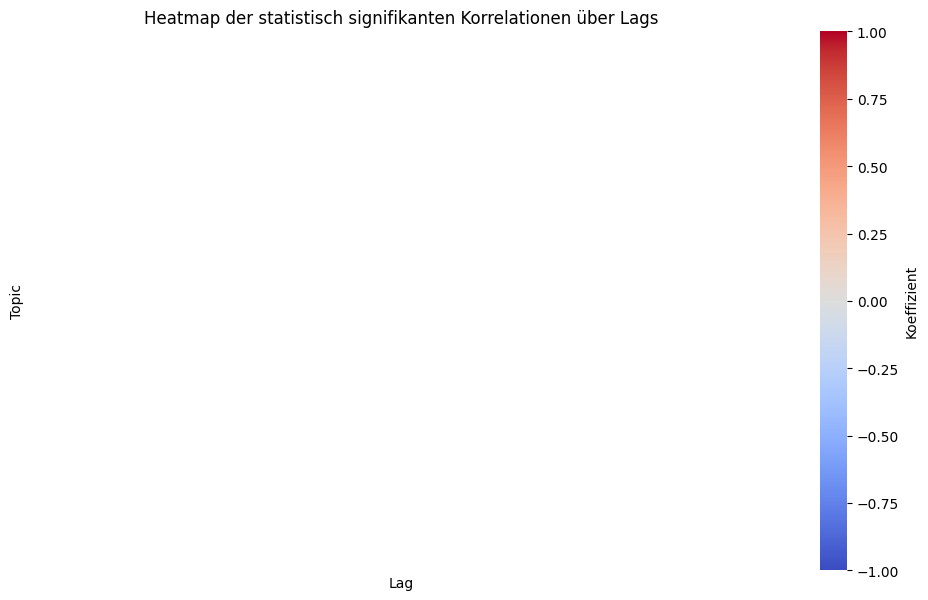

In [91]:
### HTML-Tabellen visualisieren
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from bs4 import BeautifulSoup

# 🔹 1️⃣ HTML-Regressionstabelle einlesen und in DataFrame umwandeln
def parse_regression_table(html_file):
    with open(html_file, "r", encoding="utf-8") as f:
        soup = BeautifulSoup(f, "html.parser")

    rows = soup.find_all("tr")
    data = []

    for row in rows:
        cols = row.find_all("td")
        if len(cols) >= 4:  # Sicherstellen, dass alle relevanten Spalten vorhanden sind
            try:
                variable = cols[0].text.strip()
                coefficient = float(cols[1].text.strip())
                p_value = float(cols[2].text.strip())
                lag = float(cols[3].text.strip())

                # Speichere alle Werte, um später Signifikanz zu filtern
                data.append([variable, coefficient, p_value, lag])
            except ValueError:
                pass  # Ignoriert Zeilen, die keine numerischen Werte enthalten

    return pd.DataFrame(data, columns=["Variable", "Koeffizient", "p-Wert", "lag"])

# 🔹 2️⃣ Datei einlesen und DataFrame erstellen
html_file = "regression tables/AfD/regression_table_comparison_afd_all_lags.html"  # 📂 Datei-Pfad anpassen
df = parse_regression_table(html_file)

# 🔹 3️⃣ Bereinigung der Daten: Topics und Lags extrahieren
df["Topic"] = df["Variable"].apply(lambda x: x.split("_")[1] if "topic" in x else None)
df["Lag"] = df["Variable"].apply(lambda x: x.split("_")[-1] if "lag" in x else None)
df = df.dropna()  # Entferne nicht-Topic-Werte

# 🔹 4️⃣ Filterung: Nur statistisch signifikante Werte (p < 0.05)
df_significant = df[df["p-Wert"] < 0.1]

# 🔹 5️⃣ Umwandlung in eine Pivot-Tabelle für Heatmap
heatmap_data = df_significant.pivot(index="Topic", columns="Lag", values="Koeffizient")

# 🔹 6️⃣ Heatmap zeichnen: Signifikante Korrelationen mit farblicher Markierung
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data.astype(float), annot=True, cmap="coolwarm", center=0,
            fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Koeffizient'}, vmin=-1, vmax=1)

plt.xlabel("Lag")
plt.ylabel("Topic")
plt.title("Heatmap der statistisch signifikanten Korrelationen über Lags")
plt.show()


In [96]:
html_file = "regression tables/AfD/regression_table_comparison_afd_all_lags.html"  # 📂 Datei-Pfad anpassen
df = pd.read_html(html_file)
df

[                                                   0   \
 0                                                 NaN   
 1                                                 NaN   
 2                                                 NaN   
 3                                                 NaN   
 4                                                 NaN   
 5                                                 NaN   
 6                                  KomplexitÃ¤t Posts   
 7                                                 NaN   
 8                                  KomplexitÃ¤t Reden   
 9                                                 NaN   
 10                                     Landtagswahlen   
 11                                                NaN   
 12                               Social Media Nutzung   
 13                                                NaN   
 14                                              const   
 15                                                NaN   
 16           